## Introduction:

In the ever-evolving landscape of world demographics it is paramount to be aware of trends and factors that influence the way humans experience and live their lives. Factors such as life expectancy, education and the source of happiness for different people in different countries determines the way people pursue happines and impact their environment around them.

HDI gives us a fairly objective look into the quality of life within a country, thus we can use this measure to compare key indicators of quality of life and plot them with the happiness felt within a country, we can also fraw conclusions as to what aspects of life would create happiness for citizens of a country.

One of our perspectives is that the richer a country and population is, the higher their education, the longer their lifespan and the happier a population will be. We will look for relations between a country's GNI and and their general quality of life indices.

A different and somewhat opposing perspective on our data is that a population wealth does not strictly correlate to their happiness, especially above a certain treshold of wealth. To this end we will try to look between correlations between countries with similiar geographic and cultural settings but different economic outlooks.

This is the story of that data and the conclusions we can draw from the graphics.

---
## DATASET AND PREPROCESSING

In [50]:
!pip install seaborn
!pip install csv
import pandas as pd
import csv
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
!pip install numpy
!pip install plotly
from collections import defaultdict
!pip install pandas
!pip install matplotlib
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


###

In [20]:
df = pd.read_csv('full_data.csv')

print(df.head(n=5)) # Print the first 5 rows of the dataframe

df_1 = pd.read_csv('full_data.csv')

# selects the columns to get the mean
columns_to_mean = ['Education_Index', 'government_trust', 'cpi_score', 'gdp_per_capita', 'freedom']

df_mean = df_1.groupby('Country')[columns_to_mean].mean()

# Reset the index to convert 'country' from the index to a regular column
df_mean.reset_index(inplace=True)
df_mean = df_mean.round(4)

df_mean = pd.merge(df_mean, df_1[['Country', 'continent']], on='Country')

# Display the mean DataFrame
print(df_mean)

df_mean.to_csv('mean_data.csv', index=False)

    Country  Year  Life_expectancy_at_birth  Expected_years_of_schooling  \
0  Zimbabwe  2018                    61.200                        10.45   
1  Zimbabwe  2017                    60.812                        10.30   
2  Zimbabwe  2016                    60.294                        10.30   
3  Zimbabwe  2015                    59.534                        10.30   
4    Zambia  2018                    63.510                        12.06   

   Average_of_years_of_schooling  GNI_per_capita_PPP  life_expectancy_index  \
0                           8.34             2661.07                   0.63   
1                           8.20             2860.00                   0.63   
2                           8.20             2570.00                   0.62   
3                           8.20             2410.00                   0.61   
4                           7.10             3581.89                   0.67   

   Education_Index  GNI_Index  HDI_1  ...  gdp_per_capita    family 

For this project two datasets are used to form one dataset that contains the variables of both using the datapoints they share. The first dataset used can be found on https://www.kaggle.com/datasets/unsdsn/world-happiness, this dataset contains information on some scales aimed to measure the happiness of countries in the world. This dataset contains information of countries from 2015 to 2019. The variables in this dataset are Country, which just marks down the countries in the dataset, Year, which just notes the year where the data was measured. The relevant variables are:

- happiness_score, which measures the happiness scores of each country obtained from the Gallup World Poll.
- gdp_per_capita, which describes to what extent GDP per capita contributes to a country's happiness.
- family, which describes to what extent family factors contribute to a country's happiness.
- health, which describes to what extent health factors contribute to a country's happiness. 
- freedom, which describes to what extent freedom factors contribute to a country's happiness.
- generosity, which describes to what extent generosity contributes to a country's happiness.
- government_trust, which describes to what extent trust in the government contributes to a country's happiness.
- dystopia_residual, which describes the unknown factors of a hypothetical 'worst' country (we will not use this  data, because it is not relevant for our purposes).
- social_support, which describes to what extent social support contributes to a country's happiness.
- cpi_scores, which measures the perceived corruption of a country.

---
ANALYSIS OF THE DATA

In [53]:
# Scatterplot using plotly Express
fig = px.scatter_3d(df_mean,
                    x='Education_Index',
                    y='government_trust',
                    z='cpi_score',
                    color='continent',
                    size='gdp_per_capita',
                    opacity=0.5,
                    size_max=45,
                    height=700,
                    hover_data=['Country'])

# Customize the layout
fig.update_layout(scene=dict(
    xaxis_title='Education Index',
    yaxis_title='Government Trust',
    zaxis_title='CPI Score'
))

# Makes Title 
fig.update_layout(
    title={
        'text': 'Education, Government trust, and CPI',
        'x': 0.45,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20
)
# Show the plot
fig.show()

### Does a good education give government trust?

This 3d Scatter Plot is multivariate and shows on the x-axis the 'Education Index', on the y-axis the 'Government Trust' and on the z-axis the 'CPI Score'. CPI stands for 'Corruption Perception Index', the lower the CPI index, the more the people believe there is corruption in their country. The size of the plot-points shows the GDP per capita. 

The 3D scatter plot reveals interesting insights about the correlation between the Corruption Perception Index (CPI) score and other variables across countries. A positive correlation between the CPI score and variables such as Education Index and Government trust suggests that countries with higher levels of corruption tend to exhibit lower values in education, government trust, and economic prosperity. Conversely, a negative correlation indicates that countries with lower corruption levels tend to have higher education indices and greater levels of government trust. This visualization highlights the importance of addressing corruption to foster positive development in education and trust within countries. 

The Education Index plays a significant role in shaping the relationships between various variables across countries and continents. A positive correlation between the Education Index and variables such as Government trust, GDP per capita, and possibly the Corruption Perception Index suggests that countries with higher education indices tend to exhibit greater levels of government trust and economic prosperity while combating corruption. Furthermore, the Education Index may influence the disparities observed between countries and continents. Nations with higher education indices are more likely to invest in quality education, leading to better governance, higher economic output, and potentially lower corruption levels. Thus, enhancing education systems becomes vital for promoting positive development and reducing inequality among countries and continents.

Overall it gives the visualisation that countries with a higher inducation index tend to have more goverment trust and a higher CPI score. This is probaply because people that live in a country that is able to give a good education tend to trust the goverment more than people that don't recieved good education. 

In [54]:

continent_colors = {
    'Africa': '#AEFD8E',
    'Asia': '#FAA598',
    'Europe': '#E3C97F',
    'North America': '#B47FE3',
    'Australia': '#B2E4FA',
    'South America': '#E8EAC8'
}

avg_happiness = df.groupby(['continent', 'Year'])['happiness_score'].mean().reset_index()

# Create a grouped histogram using Plotly
fig = px.histogram(avg_happiness, x='Year', y='happiness_score', color='continent', barmode='group',
                   color_discrete_map=continent_colors)


fig.update_layout(
    title='Development of Average Happiness Score by Continent',
    xaxis_title='Year',
    yaxis_title='Average Happiness',
    font=dict(family='Arial', size=14),
    legend=dict(font=dict(family='Arial', size=12)),
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)


fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')


fig.update_traces(marker=dict(line=dict(width=0.5)))


fig.show()


avg_gdp = df.groupby(['continent', 'Year'])['gdp_per_capita'].mean().reset_index()

# Create a grouped histogram using Plotly
fig = px.histogram(avg_gdp, x='Year', y='gdp_per_capita', color='continent', barmode='group',
                   color_discrete_map=continent_colors)


fig.update_layout(
    title='Development of Average contribution to happiness for GDP by Continent',
    xaxis_title='Year',
    yaxis_title='Average contribution',
    font=dict(family='Arial', size=14),
    legend=dict(font=dict(family='Arial', size=12)),
    plot_bgcolor='rgb(240, 240, 240)',
    bargap=0.2
)


fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')


fig.update_traces(marker=dict(line=dict(width=0.5)))

fig.show()

### GDP contribution to happiness

The above two histograms can support both sides of the argument. While it supports the claim that 'wealthier' countries are also happier countries for the top three richest and happiest continents (Oceania, Europe and North America), the histograms also show that the contribution of GDP per capita is not a definitive factor in happiness. This supported by the fact that South America is happier than Asia in every year while also coming close to Europe in happiness. On the contrary South America is, on average, poorer than Asia in every year and substantially poorer than Europe. Another observation that supportss the claim that happiness is not necessarily related with wealth is the fact that the average contribution of GDP to happiness of all continents shrank from 2015 to 2018, while the average happiness of every continent remained pretty much constant throughout the same years.

In [31]:
### Does a good education give government trust?

# This 3d Scatter Plot is multivariate and shows on the x-axis the 'Education Index', on the y-axis the 'Government Trust' and on the z-axis the 'CPI Score'. CPI stands for 'Corruption Perception Index', the lower the CPI index, the more the people believe there is corruption in their country. The size of the plot-points shows the GDP per capita. 

# The 3D scatter plot reveals interesting insights about the correlation between the Corruption Perception Index (CPI) score and other variables across countries. A positive correlation between the CPI score and variables such as Education Index and Government trust suggests that countries with higher levels of corruption tend to exhibit lower values in education, government trust, and economic prosperity. Conversely, a negative correlation indicates that countries with lower corruption levels tend to have higher education indices and greater levels of government trust. This visualization highlights the importance of addressing corruption to foster positive development in education and trust within countries. 

# The Education Index plays a significant role in shaping the relationships between various variables across countries and continents. A positive correlation between the Education Index and variables such as Government trust, GDP per capita, and possibly the Corruption Perception Index suggests that countries with higher education indices tend to exhibit greater levels of government trust and economic prosperity while combating corruption. Furthermore, the Education Index may influence the disparities observed between countries and continents. Nations with higher education indices are more likely to invest in quality education, leading to better governance, higher economic output, and potentially lower corruption levels. Thus, enhancing education systems becomes vital for promoting positive development and reducing inequality among countries and continents.

# Overall it gives the visualisation that countries with a higher inducation index tend to have more goverment trust and a higher CPI score. This is probaply because people that live in a country that is able to give a good education tend to trust the goverment more than people that don't recieved good education. 
data = df.sort_values('Year', ascending=True)


fig = px.scatter(data, x='happiness_score', y='GNI_per_capita_PPP', color='continent',
                 color_discrete_map=continent_colors, hover_data=['Country'], facet_row='Year')


fig.update_layout(
    title='Scatter Plot of GNI per Capita (PPP) vs Happiness by Year',
    xaxis_title='Happiness score',
    yaxis_title='GNI per Capita (PPP)',
    height=1000,  
    width = 800,
    plot_bgcolor='rgb(240, 240, 240, 240)'
)


fig.update_traces(hovertemplate='Country: %{customdata[0]}<br>Happines: %{x}<br>GNI per Capita (PPP): %{y}')


fig.show()

### GNI and happiness
While these scatterplots show that having a 'richer' population (measured with GNI_per_capita adjusted for PPP) is generally related with having a happier population. These scatterplots also show that countries with a poorer population can still have happier population. This is exemplified by the fact that a country like Mexico has a much poorer population than a country like Singapore (which has by far the richest population) while their happiness scores are pretty much equal to each other. Furthermore, these scatterplots show that most countries move stronger along the x-axis than along the y-axis, this means that countries can become happier or unhappier regardless of the economic wealth of their citizens. Kuwait, however shows the exact opposite side of this phenomenon, they show great growth in their GNI per capita while their happiness scores do not increase or decrease drastically.

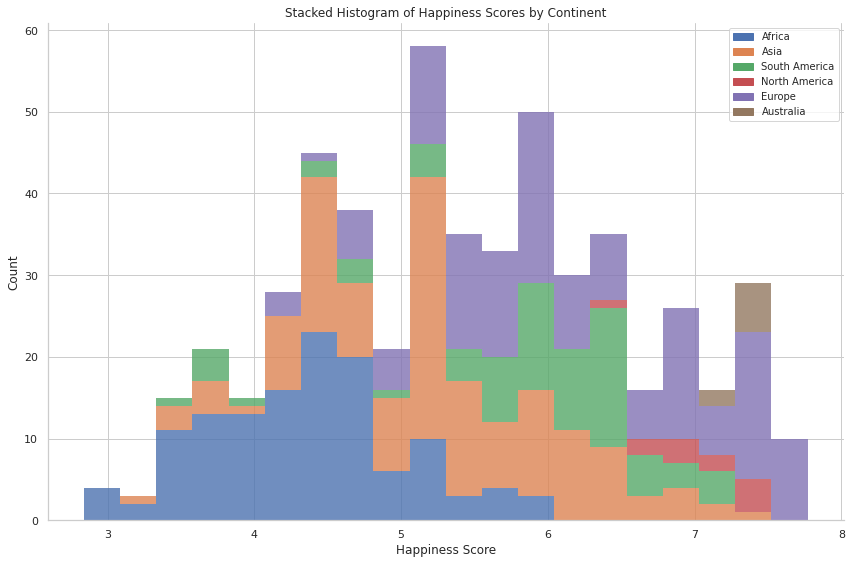

In [51]:

continent_scores = defaultdict(list)

with open('full_data.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        continent = row['continent']
        country = row['Country']
        year = row['Year']
        happiness_score = float(row['happiness_score'])
        continent_scores[continent].append((country, year, happiness_score))


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


palette = sns.color_palette("deep", len(continent_scores))


country_heights = []

for continent, scores in continent_scores.items():
    heights = [score for _, _, score in scores]
    country_heights.append(heights)


bars = plt.hist(country_heights, bins=20, stacked=True, label=list(continent_scores.keys()), color=palette, alpha=0.8, linewidth=0)


legend_patches = [mpatches.Patch(color=palette[i], label=continent) for i, continent in enumerate(continent_scores.keys())]
plt.legend(handles=legend_patches, loc='upper right', fontsize='small')


fig = plt.gcf()
ax = plt.gca()

def hover(event):
    for container in bars:
        for rect in container:
            cont, ind = rect.contains(event)
            if cont:
                heights = [height.get_height() for height in container]
                countries = [country for country in continent_scores.keys()]
                bins = bars[1]
                bin_width = np.diff(bins)[0]
                index = ind["ind"][0]
                x = bars[1][index] + bin_width / 2
                y = heights[index]
                plt.annotate(f"{countries[index]}: {y:.2f}", xy=(x, y), xytext=(x, y + 0.2),
                             ha='center', va='bottom', color='black', alpha=0.7,
                             arrowprops=dict(arrowstyle='-', lw=0.5, color='black'))
                fig.canvas.draw_idle()

plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.title("Stacked Histogram of Happiness Scores by Continent")
plt.tight_layout()
sns.despine()

plt.show()


### happiness score by continent

The graph above shows us the amount of countries that are within a certain rounded score of happiness, the happiness is rounded to the nearest integer. As we can see African countries are the lowest on the scale of happiness while western countries are near the top of the distribution. Interesting to note is that while South american countries are poorer and less developed compared to western or Asian countries, their happiness is above what would be expected of their demographic metrics. Further relations in the world happiness dataset need to be drawn to conclude what causes such happiness has outside of income or education. The factors for happiness in these countries will be analyzed later in this notebook to gain an insight into the true factors of happiness.

In [52]:
def get_happiness_scores_by_continent(filename):
    import csv
    import plotly.express as px

    continent_scores = {}

    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            continent = row['continent']
            year = int(row['Year'])
            happiness_score = round(float(row['happiness_score']))
            education_index = min(float(row['Education_Index']) * 10, 10)
            education_index = round(education_index) / 10
            gni_per_capita = float(row['GNI_per_capita_PPP']) if row['GNI_per_capita_PPP'] != '' else 0
            gni_per_capita = int(gni_per_capita) // 10000 * 10000
            life_expectancy_index = min(float(row['life_expectancy_index']) * 10, 10)
            life_expectancy_index = round(life_expectancy_index) / 10

            if continent not in continent_scores:
                continent_scores[continent] = {'Year': [], 'Happiness Score': [], 'Education Index': [], 'GNI per capita': [], 'Life Expectancy Index': []}
            continent_scores[continent]['Year'].append(year)
            continent_scores[continent]['Education Index'].append(education_index)
            continent_scores[continent]['Happiness Score'].append(happiness_score)
            continent_scores[continent]['GNI per capita'].append(gni_per_capita)
            continent_scores[continent]['Life Expectancy Index'].append(life_expectancy_index)

    data = []
    for continent, scores in continent_scores.items():
        sorted_scores = sorted(zip(scores['Year'], scores['Education Index'], scores['GNI per capita'], scores['Happiness Score'], scores['Life Expectancy Index']), key=lambda x: (x[1], -x[2], -x[3]))
        data.extend([
            {'Continent': continent, 'Education Index': education_index, 'Year': year, 'GNI per capita': gni_per_capita, 'Happiness Score': score, 'Life Expectancy Index': life_expectancy_index}
            for year, education_index, gni_per_capita, score, life_expectancy_index in sorted_scores
        ])

    
    for category in ['Year', 'GNI per capita', 'Happiness Score', 'Life Expectancy Index']:
        data = sorted(data, key=lambda x: x[category])

    dimensions_order = ['Continent', 'Year', 'Education Index', 'GNI per capita', 'Happiness Score', 'Life Expectancy Index']
    dimensions_labels = {'Happiness Score': 'Happiness Score'}

    fig = px.parallel_categories(data, dimensions=dimensions_order, color='Happiness Score', color_continuous_scale='Viridis',
                                 labels=dimensions_labels)
    fig.show()


get_happiness_scores_by_continent('full_data.csv')

### multivariate analysis of happiness and HDI

Here we analyse multiple variables of the HDI index and link them to happiness in a country, this parallel category graph can tell us more about how life expectancy and education can contribute to happiness in a certain country. The relation between Life Expectancy, Education and happiness is very clear, it is to be expected that people would be happier when they are healthier, this correlation is expected to be stronger than Education, which in turn is expected to correlate stronger with happiness than GNI. People can live in relatively economic poverty and adapt to their circumstances with hedonic adaptation, however when health is poor it will be much more noticeable. Disease contributes to lack of exercise, lack of proper nutrition, which in turn affects mental state through somatic effects on the brain.

---
REFLECTION HIERONDER


Throughout the assignment, we engaged in a collaborative effort to analyze and visualize the data. We worked together to clean and transform the datasets, ensuring the accuracy and reliability of our visualizations. This process required attention to detail and problem-solving skills as we encountered challenges such as missing values and outliers. Using Pandas, we manipulated and reshaped the data to uncover insights. We experimented with different chart types, colors, and layouts to present our findings effectively. Through bar plots, line plots, 3d-scatter plots and much more, we showcased the relationship between happiness scores, GDP per capita and a lot of other correlated subjects.

During our exploration, we made intriguing observations and encountered unexpected patterns. We delved deeper into the data, conducting additional research to understand the factors contributing to these deviations. Incorporating contextual information, we provided a comprehensive interpretation of the data, enriching our visualizations. Working as a group allowed us to leverage each other's strengths and learn from one another. We collaborated on data preprocessing, visualization techniques, and interpretation, fostering our technical and analytical skills. We discovered the power of data storytelling and its ability to convey insights in a compelling manner.

This assignment was a valuable learning experience for our group. It deepened our understanding of data analysis and visualization while highlighting the importance of collaboration and teamwork. Moving forward, we will continue to refine our skills and explore new opportunities to apply data-driven approaches in solving real-world problems.


---
WORK DISTRIBUTION